In [1]:
import numpy as np
from scipy.optimize import curve_fit

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

## Time by Rate $(200<z<300)$

### Extracting

In [3]:
def extract(filepath):
    with open(filepath) as f:
        lines = f.readlines()
    xs = []
    ys = []
    for i in range(len(lines)):
        line = lines[i]
        chunk = line.split(' ')
        if chunk[0] == 'Testing':
            x = float(chunk[4])
            sumy = 0
            j = i + 1
            while j < len(lines):
                subline = lines[j]
                subchunk = subline.split(' ')
                if subchunk[0] == 'Interpolation':
                    sumy += float(subchunk[3])
                    j += 1
                else:
                    break
            y = sumy / (j - i - 1)
            xs.append(x)
            ys.append(y)
    return np.array(xs), np.array(ys)

In [4]:
rates_kraken, rates_time_kraken = extract('rates_time_kraken.txt')

In [5]:
rates_lakota, rates_time_lakota = extract('rates_time_lakota.txt')

In [6]:
rates_chiron, rates_time_chiron = extract('rates_time_chiron.txt')

In [7]:
rates_cluster, rates_time_cluster = extract('rates_time_cluster.txt')

### Plotting

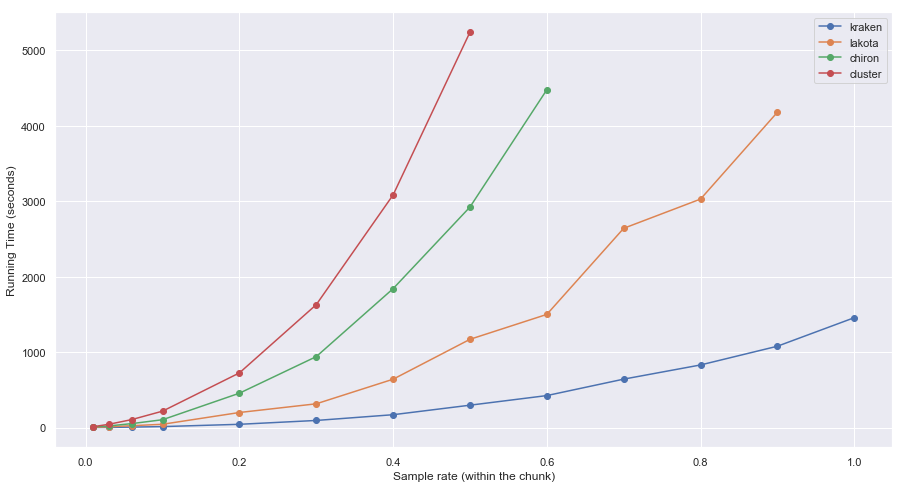

In [8]:
plt.figure(figsize=(15,8))
plt.plot(rates_kraken, rates_time_kraken, marker='o', label='kraken')
plt.plot(rates_lakota, rates_time_lakota, marker='o', label='lakota')
plt.plot(rates_chiron, rates_time_chiron, marker='o', label='chiron')
plt.plot(rates_cluster, rates_time_cluster, marker='o', label='cluster')

# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Sample rate (within the chunk)')
plt.ylabel('Running Time (seconds)')
plt.legend()
plt.show()

### Curve Fitting

In [9]:
# logarithmic exp_function
def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

In [10]:
def fitting_rates(x, y):
    popt, pcov = curve_fit(exp_func, x, y, p0=(1, 1e-5, 1))
    fitx = np.arange(0, 1, 0.01)
    fity = exp_func(fitx, *popt)
    return fitx, fity

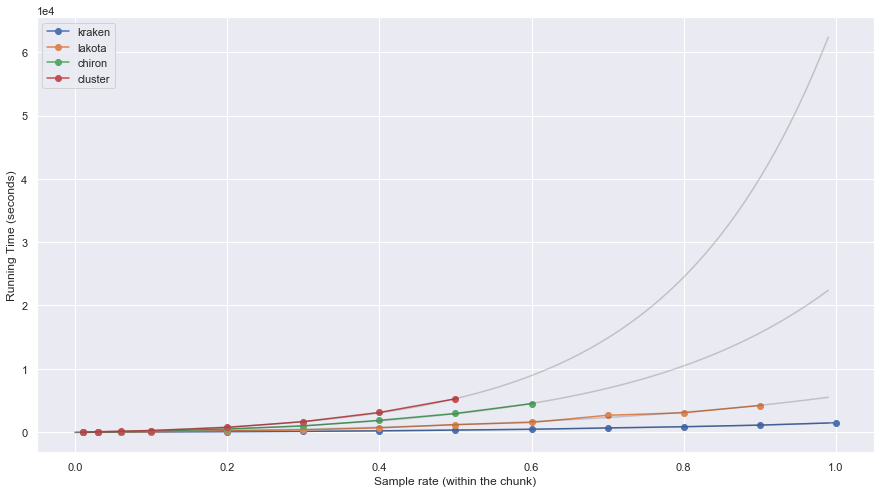

In [11]:
plt.figure(figsize=(15,8))
plt.plot(rates_kraken, rates_time_kraken, marker='o', label='kraken')
plt.plot(*fitting_rates(rates_kraken, rates_time_kraken), c='k', alpha=0.2)
plt.plot(rates_lakota, rates_time_lakota, marker='o', label='lakota')
plt.plot(*fitting_rates(rates_lakota, rates_time_lakota), c='k', alpha=0.2)
plt.plot(rates_chiron, rates_time_chiron, marker='o', label='chiron')
plt.plot(*fitting_rates(rates_chiron, rates_time_chiron), c='k', alpha=0.2)
plt.plot(rates_cluster, rates_time_cluster, marker='o', label='cluster')
plt.plot(*fitting_rates(rates_cluster, rates_time_cluster), c='k', alpha=0.2)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Sample rate (within the chunk)')
plt.ylabel('Running Time (seconds)')
plt.legend()
plt.show()

### Logarithm Curve Fitting

In [12]:
# logarithmic exp_function
def linear_func(x, a, b):
    return a * x + b

In [13]:
def fitting_rates(x, y):
    popt, pcov = curve_fit(linear_func, x, y, p0=(1, 1))
    fitx = np.arange(0, 1, 0.01)
    fity = linear_func(fitx, *popt)
    return fitx, fity

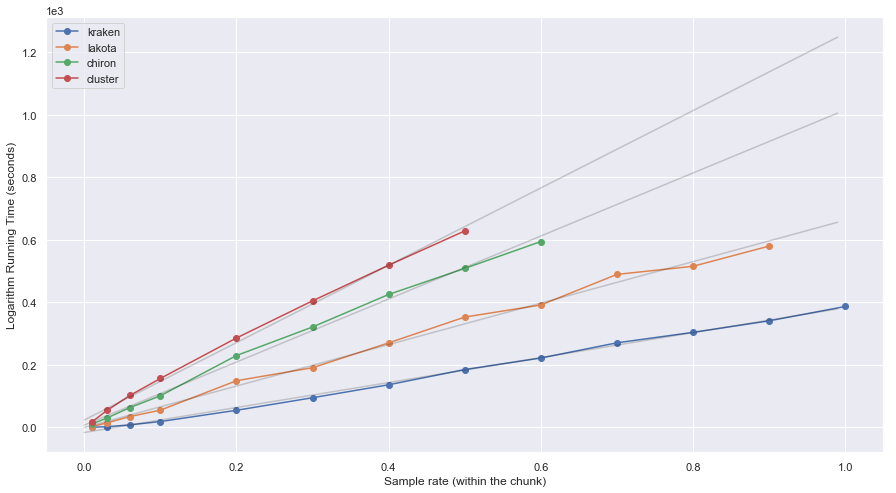

In [30]:
plt.figure(figsize=(15,8))
plt.plot(rates_kraken, np.log(rates_time_kraken)**3, marker='o', label='kraken')
plt.plot(*fitting_rates(rates_kraken, np.log(rates_time_kraken)**3), c='k', alpha=0.2)
plt.plot(rates_lakota, np.log(rates_time_lakota)**3, marker='o', label='lakota')
plt.plot(*fitting_rates(rates_lakota, np.log(rates_time_lakota)**3), c='k', alpha=0.2)
plt.plot(rates_chiron, np.log(rates_time_chiron)**3, marker='o', label='chiron')
plt.plot(*fitting_rates(rates_chiron, np.log(rates_time_chiron)**3), c='k', alpha=0.2)
plt.plot(rates_cluster, np.log(rates_time_cluster)**3, marker='o', label='cluster')
plt.plot(*fitting_rates(rates_cluster, np.log(rates_time_cluster)**3), c='k', alpha=0.2)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Sample rate (within the chunk)')
plt.ylabel('Logarithm Running Time (seconds)')
plt.legend()
plt.show()

## Time by Chunk $(rate=1)$

### Extracting

In [15]:
def extract2(filepath):
    with open(filepath) as f:
        lines = f.readlines()
    xs = []
    ys = []
    for i in range(len(lines)):
        line = lines[i]
        chunk = line.split(' ')
        if chunk[0] == 'Testing':
            x = float(chunk[4]) / 2433528
            sumy = 0
            j = i + 1
            while j < len(lines):
                subline = lines[j]
                subchunk = subline.split(' ')
                if subchunk[0] == 'Interpolation':
                    sumy += float(subchunk[3])
                    j += 1
                else:
                    break
            y = sumy / (j - i - 1)
            xs.append(x)
            ys.append(y)
    return np.array(xs), np.array(ys)

In [16]:
sizes_kraken, sizes_time_kraken = extract2('sizes_time_kraken.txt')

In [17]:
sizes_lakota, sizes_time_lakota = extract2('sizes_time_lakota.txt')

In [18]:
sizes_chiron, sizes_time_chiron = extract2('sizes_time_chiron.txt')

In [19]:
sizes_cluster, sizes_time_cluster = extract2('sizes_time_cluster.txt')

### Plotting

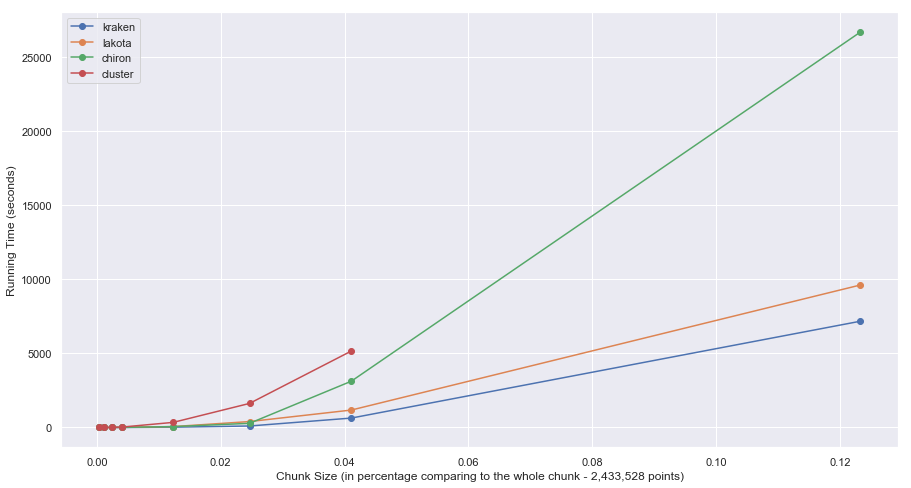

In [20]:
plt.figure(figsize=(15,8))
plt.plot(sizes_kraken, sizes_time_kraken, marker='o', label='kraken')
plt.plot(sizes_lakota, sizes_time_lakota, marker='o', label='lakota')
plt.plot(sizes_chiron, sizes_time_chiron, marker='o', label='chiron')
plt.plot(sizes_cluster, sizes_time_cluster, marker='o', label='cluster')

# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Chunk Size (in percentage comparing to the whole chunk - 2,433,528 points)')
plt.ylabel('Running Time (seconds)')
plt.legend()
plt.show()

### Curve Fitting

In [21]:
# logarithmic exp_function
def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

In [22]:
def fitting_sizes(x, y):
    popt, pcov = curve_fit(exp_func, x, y, p0=(1, 1e-3, 1))
    fitx = np.arange(0, 1, 0.001)
    fity = exp_func(fitx, *popt)
    return fitx, fity

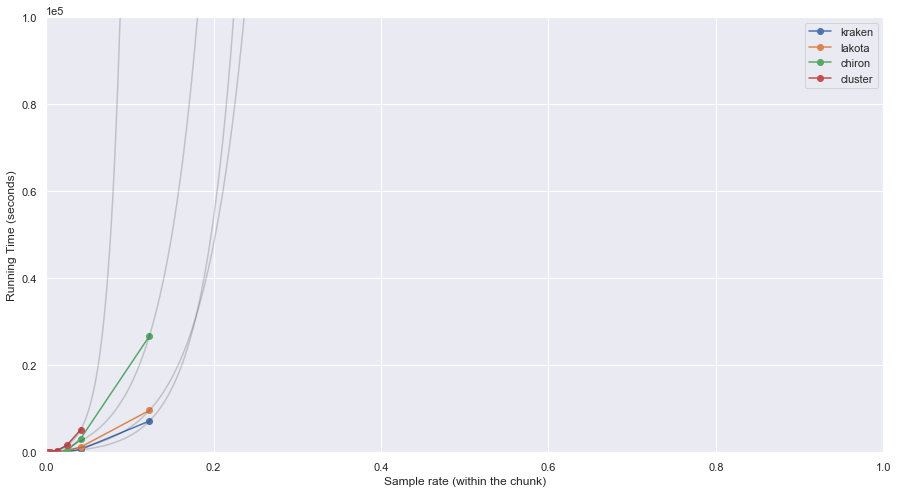

In [23]:
plt.figure(figsize=(15,8))
plt.plot(sizes_kraken, sizes_time_kraken, marker='o', label='kraken')
plt.plot(*fitting_sizes(sizes_kraken, sizes_time_kraken), c='k', alpha=0.2)
plt.plot(sizes_lakota, sizes_time_lakota, marker='o', label='lakota')
plt.plot(*fitting_sizes(sizes_lakota, sizes_time_lakota), c='k', alpha=0.2)
plt.plot(sizes_chiron, sizes_time_chiron, marker='o', label='chiron')
plt.plot(*fitting_sizes(sizes_chiron, sizes_time_chiron), c='k', alpha=0.2)
plt.plot(sizes_cluster, sizes_time_cluster, marker='o', label='cluster')
plt.plot(*fitting_sizes(sizes_cluster, sizes_time_cluster), c='k', alpha=0.2)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Sample rate (within the chunk)')
plt.ylabel('Running Time (seconds)')
plt.xlim([0,1])
plt.ylim([0,1e5])
plt.legend()
plt.show()

### Logarithm Curve Fitting

In [24]:
# logarithmic exp_function
def linear_func(x, a, b):
    return a * x + b

In [25]:
def fitting_sizes(x, y):
    popt, pcov = curve_fit(linear_func, x, y, p0=(1, 1))
    fitx = np.arange(0, 1, 0.01)
    fity = linear_func(fitx, *popt)
    return fitx, fity

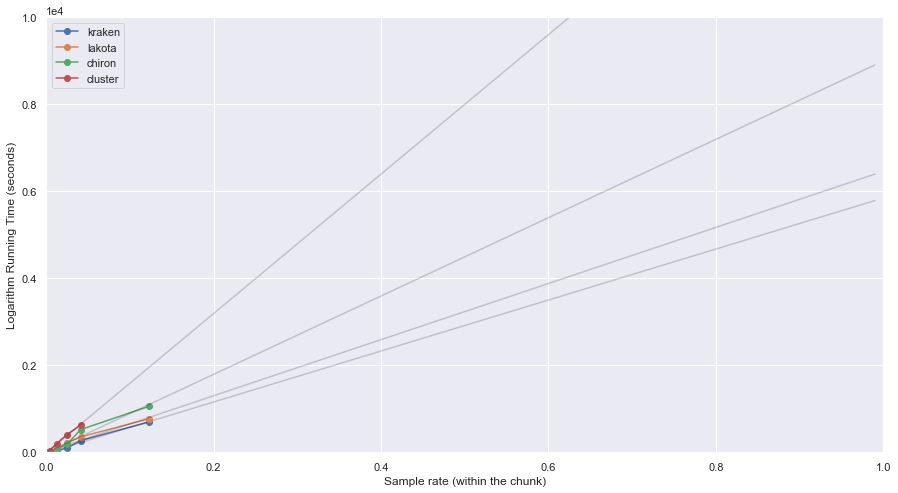

In [26]:
plt.figure(figsize=(15,8))
plt.plot(sizes_kraken, np.log(sizes_time_kraken)**3, marker='o', label='kraken')
plt.plot(*fitting_sizes(sizes_kraken, np.log(sizes_time_kraken)**3), c='k', alpha=0.2)
plt.plot(sizes_lakota, np.log(sizes_time_lakota)**3, marker='o', label='lakota')
plt.plot(*fitting_sizes(sizes_lakota, np.log(sizes_time_lakota)**3), c='k', alpha=0.2)
plt.plot(sizes_chiron, np.log(sizes_time_chiron)**3, marker='o', label='chiron')
plt.plot(*fitting_sizes(sizes_chiron, np.log(sizes_time_chiron)**3), c='k', alpha=0.2)
plt.plot(sizes_cluster, np.log(sizes_time_cluster)**3, marker='o', label='cluster')
plt.plot(*fitting_sizes(sizes_cluster, np.log(sizes_time_cluster)**3), c='k', alpha=0.2)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Sample rate (within the chunk)')
plt.ylabel('Logarithm Running Time (seconds)')
plt.ylim([0,1e4])
plt.xlim([0,1])
plt.legend()
plt.show()

## Prediction for Kraken

In [27]:
def predict(x, y, n):
    popt, pcov = curve_fit(exp_func, x, y, p0=(1, 1e-3, 1))
    return exp_func(n, *popt)

With $1\% \ (24,335)$ points, the interpolation will take 50 seconds.

In [31]:
predict(sizes_kraken, sizes_time_kraken, 0.01)

50.06194831566944

With $10\% \ (243,353)$ points, the interpolation will take 1.05 hours.

In [33]:
predict(sizes_kraken, sizes_time_kraken, 0.1) / 3600

1.050468666333541

With $20\% \ (486,706)$ points, the interpolation will take 14.97 hours.

In [34]:
predict(sizes_kraken, sizes_time_kraken, 0.2) / 3600

14.973697007468125

With $50\% \ (1,216,764)$ points, the interpolation will take 3.87 years.

In [35]:
predict(sizes_kraken, sizes_time_kraken, 0.5) / 3600 / 24 / 365.24

3.871516136544108

For the whole data cube $(2,433,528)$ points, the interpolation will take 1.50 million years.

In [37]:
predict(sizes_kraken, sizes_time_kraken, 1) / 3600 / 24 / 365.24 / 1000000

1.497346375531461